#Market Basket Analysis in Grocery Basket
The Movies dataset is relatively large for tutoring purposes. For that reason we will provide another example with a smaller dataset which are hypothetical transactions (baskets) from a grocery.

In [8]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder



In [7]:
groceries = pd.read_csv('/content/groceries.csv')
groceries

,ID,Transaction
0,0,"milk,bread,biscuit"
1,1,"bread,milk,biscuit,cereal"
2,2,"bread,tea"
3,3,"jam,bread,milk"
4,4,"tea,biscuit"
5,5,"bread,tea"
6,6,"tea,cereal"
7,7,"bread,tea,biscuit"
8,8,"jam,bread,tea"
9,9,"bread,milk"


As you can see the items are in the same row, separated by a comma. There are two ways to create the onehot data frame. One is to work with the CountVectorizer as explained in another post or to work with the TransactionEncoder as we will show right now. For this example, we will work with association rules of 3 items.

In [12]:

# get all the transcactions as a list
transcactions = list(groceries['Transaction'].apply(lambda x: sorted(x.split(','))))


# instantiate transcation encoder
encoder = TransactionEncoder().fit(transcactions)

onehot = encoder.transform(transcactions)

# convert one-hot encode data to DataFrame
onehot = pd.DataFrame(onehot, columns=encoder.columns_)
# compute frequent items using the Apriori algorithm - Get up to three items
frequent_itemsets = apriori(onehot, min_support = 0.001, max_len = 3, use_colnames=True)

# compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(biscuit),(cereal),0.40,0.30,0.15,0.375000,1.250000,0.0300,1.120000
1,(cereal),(biscuit),0.30,0.40,0.15,0.500000,1.250000,0.0300,1.200000
2,(milk),(biscuit),0.25,0.40,0.10,0.400000,1.000000,0.0000,1.000000
3,(biscuit),(milk),0.40,0.25,0.10,0.250000,1.000000,0.0000,1.000000
4,(biscuit),(orange),0.40,0.15,0.10,0.250000,1.666667,0.0400,1.133333
...,...,...,...,...,...,...,...,...,...
111,"(milk, coffee)",(tea),0.05,0.35,0.05,1.000000,2.857143,0.0325,inf
112,"(tea, coffee)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf
113,(milk),"(tea, coffee)",0.25,0.05,0.05,0.200000,4.000000,0.0375,1.187500
114,(tea),"(milk, coffee)",0.35,0.05,0.05,0.142857,2.857143,0.0325,1.108333


Let’s say that we want to get the top associated rules, given that the left-hand side has two items, then which item is more likely to be added to the basket?

In [13]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
59,"(biscuit, coffee)",(orange),0.10,0.15,0.10,1.000000,6.666667,0.0850,inf,2
52,"(biscuit, cereal)",(orange),0.15,0.15,0.10,0.666667,4.444444,0.0775,2.55,2
112,"(tea, coffee)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,2
64,"(bread, cereal)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,2
104,"(milk, tea)",(cereal),0.05,0.30,0.05,1.000000,3.333333,0.0350,inf,2


As we can see, if someone has already added to his basket (coffee, biscuit) or (cereal, biscuit) then the item which is more likely to be added is orange

#Visualize Market Basket Analysis
Now, we will show how we can visualize the Market Basket Analysis Association Rules using Heatmap. We will show all the rules where the left-hand side consists of 2 items and we are looking for an extra one.

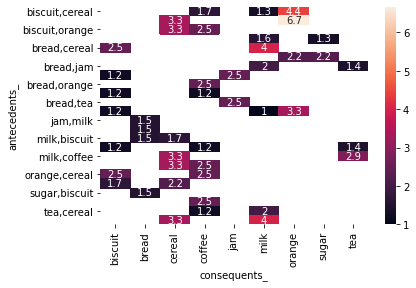

In [17]:
# Import seaborn under its standard alias
import seaborn as sns
import matplotlib.pyplot as plt
# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()